# Exploratory Data Analysis
<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#When-do-most-wildfires-occur?" data-toc-modified-id="When-do-most-wildfires-occur?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When do most wildfires occur?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Acres-burned-over-time?" data-toc-modified-id="Acres-burned-over-time?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acres burned over time?</a></span></li><li><span><a href="#Top-Ten-Largest-Fires" data-toc-modified-id="Top-Ten-Largest-Fires-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Top Ten Largest Fires</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Where-do-wildfires-occur?" data-toc-modified-id="Where-do-wildfires-occur?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Where do wildfires occur?</a></span></li><li><span><a href="#How-long-do-wildfires-burn-for?" data-toc-modified-id="How-long-do-wildfires-burn-for?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How long do wildfires burn for?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#How-was-the-weather?" data-toc-modified-id="How-was-the-weather?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How was the weather?</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Look-for-Multicollinearity" data-toc-modified-id="Look-for-Multicollinearity-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Look for Multicollinearity</a></span></li></ul></div>

## Introduction

In [1]:
# data analysis & manipulation
import pandas as pd
import numpy as np

# tools
import pickle

# visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keplergl import KeplerGl

# notebook options
pd.set_option('display.precision', 2)

In [2]:
# load pickle
df = pd.read_pickle('../data/01_fire_weather.pkl')
df.head()

Name  Latitude  Longitude  AcresBurned    Counties  \
52378c  Pilot Fire     40.62    -123.68           30  [Humboldt]   
398fe2  Scott Fire     39.25    -121.32           80      [Yuba]   
030e7d   York Fire     35.82    -120.10          161     [Kings]   
b5b503   Cana Fire     39.84    -121.96           10     [Butte]   
abd7ac  Woody Fire     35.65    -118.93          115      [Kern]   

                               AdminUnit                          Updated  \
52378c   CAL FIRE Humbolt-Del Norte Unit        2019-01-15 10:38:00+00:00   
398fe2  CAL FIRE Nevada-Yuba-Placer Unit 2019-06-27 08:24:51.860000+00:00   
030e7d               Fresno-Kings County        2019-06-24 11:45:00+00:00   
b5b503      CAL FIRE / Butte County Fire        2019-05-08 08:47:00+00:00   
abd7ac       Kern County Fire Department        2019-05-08 08:47:00+00:00   

                         Started              Extinguished  CalFireIncident  \
52378c 2019-01-01 14:14:00+00:00 2019-01-15 10:38:00+00:00             True   
398fe2 2019-06-25 13:51:09+00:00 2019-06-25 13:50:00+00:00             True   
030e7d 2019-04-28 22:20:00+00:00 2019-06-24 11:45:00+00:00             True   
b5b503 2019-04-30 12:20:00+00:00 2019-05-08 08:47:00+00:00             True   
abd7ac 2019-04-30 18:37:00+00:00 2019-05-08 08:47:00+00:00            False   

        ...                     geometry  \
52378c  ...  POINT (-123.67556 40.61806)   
398fe2  ...  POINT (-121.32399 39.24678)   
030e7d  ...  POINT (-120.09715 35.81778)   
b5b503  ...  POINT (-121.95700 39.83958)   
abd7ac  ...  POINT (-118.92545 35.65189)   

                                               RequestURL  sunsetTime  \
52378c  https://api.darksky.net/forecast/4f4ef1267ba70...  1546390740   
398fe2  https://api.darksky.net/forecast/4f4ef1267ba70...  1561520220   
030e7d  https://api.darksky.net/forecast/4f4ef1267ba70...  1556505960   
b5b503  https://api.darksky.net/forecast/4f4ef1267ba70...  1556679720   
abd7ac  https://api.darksky.net/forecast/4f4ef1267ba70...  1556678520   

        moonPhase  precipIntensity  temperatureHigh  temperatureLow  dewPoint  \
52378c       0.88         6.00e-04            52.46           32.19     13.31   
398fe2       0.77         4.00e-04            91.96           60.33     50.88   
030e7d       0.82         9.00e-04            83.37           56.30     48.51   
b5b503       0.88         1.60e-03            72.21           47.45     45.50   
abd7ac       0.88         7.00e-04            70.64           51.38     46.74   

        humidity  windSpeed  
52378c      0.37       5.86  
398fe2      0.42       4.96  
030e7d      0.55       7.75  
b5b503      0.60       6.20  
abd7ac      0.63       6.10  

[5 rows x 21 columns]

## When do most wildfires occur?

In [3]:
# wildfires by year – count & percent of total
pd.DataFrame([df['Started'].dt.year.value_counts().sort_index(), 
              round(df['Started'].dt.year.value_counts(normalize=True).sort_index(), 2)
             ],
             index=['Count', 'Percent of Total']).transpose()

Count  Percent of Total
2013  138.0              0.10
2014   69.0              0.05
2015   93.0              0.07
2016  147.0              0.11
2017  409.0              0.31
2018  297.0              0.22
2019  187.0              0.14

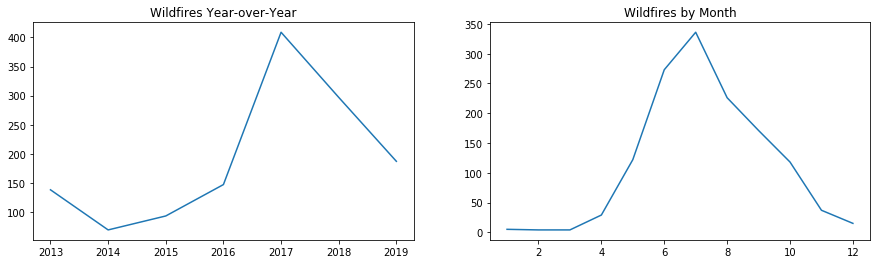

In [4]:
plt.figure(figsize = [15, 4])

# wildfires year-over-year
plt.subplot(1,2,1)
plt.title('Wildfires Year-over-Year')
plt.plot(df['Started'].dt.year.value_counts().sort_index())

# wildfires by month
plt.subplot(1,2,2)
plt.title('Wildfires by Month')
plt.plot(df['Started'].dt.month.value_counts().sort_index())

### Findings
* 67% of wildfires from this dataset are from 2017-2019
    * It appears that most wildfires aren't tracked as various sources indicate that there are thousands of wildfires every year. [[source]](https://www.zurichna.com/about/news/news-releases/2020/lessons-from-california-fires-investing-in-resilience-is-key)

## Acres burned over time?

In [5]:
fire_year = df['Started'].dt.year
df.groupby(fire_year).agg(['sum', 'mean', 'median'])['AcresBurned']

sum     mean  median
Started                          
2013      496877  3600.56   124.5
2014      261348  3787.65   274.0
2015      412606  4436.62   116.0
2016      319592  2174.10   120.0
2017     1205647  2947.79    78.0
2018     1569187  5283.46    77.0
2019      192448  1029.13    80.0

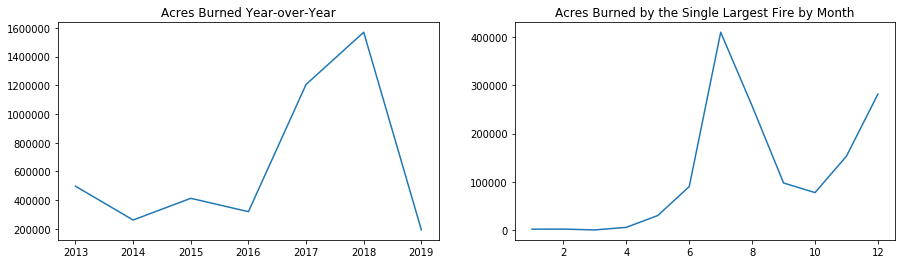

In [6]:
plt.figure(figsize = [15, 4])

# acres burned year-over-year
plt.subplot(1,2,1)
plt.title('Acres Burned Year-over-Year')
plt.plot(df.groupby(fire_year).agg(['sum'])['AcresBurned'])

# acres burned by the largest fire each month
plt.subplot(1,2,2)
plt.title('Acres Burned by the Single Largest Fire by Month')
fire_month = df['Started'].dt.month
plt.plot(df.groupby(fire_month).agg(['max'])['AcresBurned'])

## Top Ten Largest Fires

In [7]:
df.loc[:, ['AcresBurned', 'Name', 'Started']].nlargest(10, columns='AcresBurned')

AcresBurned                            Name                   Started
faf950       410203  Ranch Fire (Mendocino Complex) 2018-07-27 12:05:00+00:00
d40bee       281893                     Thomas Fire 2017-12-04 18:28:00+00:00
939e78       257314                        Rim Fire 2013-08-17 15:25:00+00:00
7a6c9d       229651                       Carr Fire 2018-07-23 13:15:00+00:00
5f6014       153336                       Camp Fire 2018-11-08 06:33:00+00:00
831f7d       151623                     Rough Fire  2015-07-31 19:00:00+00:00
d61261        97717                       King Fire 2014-09-13 16:32:00+00:00
ac65c6        96949                    Woolsey Fire 2018-11-08 14:24:00+00:00
df44ed        96901                   Ferguson Fire 2018-07-13 21:36:00+00:00
a0e84a        90288                     County Fire 2018-06-30 14:12:00+00:00

### Findings
* Although 2017 had the most wildfires logged, 2018 was more arguably more destructive as there were more acres burned.
* Some of the largest fires have been late in the year such as the Thomas Fire (Dec-2017) and the Camp Fire (Nov-2018).

## Where do wildfires occur?
* Counties
* Lat/long

In [8]:
# load the config
%run ../data/02_map_config.py

<Figure size 432x288 with 0 Axes>

In [9]:
# load the map
map_data = df.loc[:, ['Name', 'Latitude', 'Longitude', 'AcresBurned']]
map_fires = KeplerGl(height=650,
                     data={'wildfires': map_data},
                     name='wildfires',
                     config=config)
map_fires

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '2adex5', 'type': '…

## How long do wildfires burn for?

In [10]:
# median wildfire duration
duration = (df['Extinguished'] - df['Started'])
duration.median()

Timedelta('80 days 23:12:00')

/Users/miguel/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/miguel/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 25., 292.,  67.,  85.,  23.,  40.,  28.,   8.,  10.,   9.]),
 array([-2. , -0.4,  1.2,  2.8,  4.4,  6. ,  7.6,  9.2, 10.8, 12.4, 14. ]),
 <a list of 10 Patch objects>)

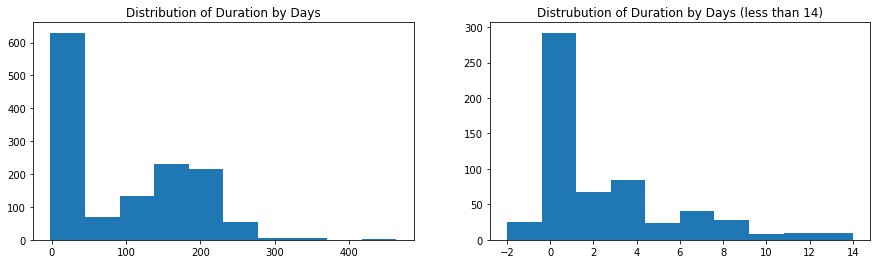

In [11]:
# define duration by days
duration_days = duration.astype('timedelta64[D]')

plt.figure(figsize = [15, 4])

# distribution of duration
plt.subplot(1, 2, 1)
plt.title('Distribution of Duration by Days')
plt.hist(duration_days)

plt.subplot(1, 2, 2)
plt.title('Distrubution of Duration by Days (less than 14)')
plt.hist(duration_days.where(duration_days <= 14))

### Findings
* Well, it looks like we can't rely on the duration of wildfires as sources indicates most fires are extinguished within a week, but our data has the mean as 80 days! [[2019]](https://en.wikipedia.org/wiki/2019_California_wildfires) [[2018]](https://en.wikipedia.org/wiki/2018_California_wildfires)

## How was the weather?

In [12]:
df.iloc[:, -6:].agg(['mean', 'median', 'max', 'min'])

precipIntensity  temperatureHigh  temperatureLow  dewPoint  humidity  \
mean           3.60e-04            86.90           58.47     42.52      0.40   
median         0.00e+00            88.23           58.83     45.11      0.38   
max            1.92e-02           119.78           89.23     64.99      0.92   
min            0.00e+00            46.56           19.42     -6.80      0.06   

        windSpeed  
mean         5.09  
median       4.50  
max         17.76  
min          0.64

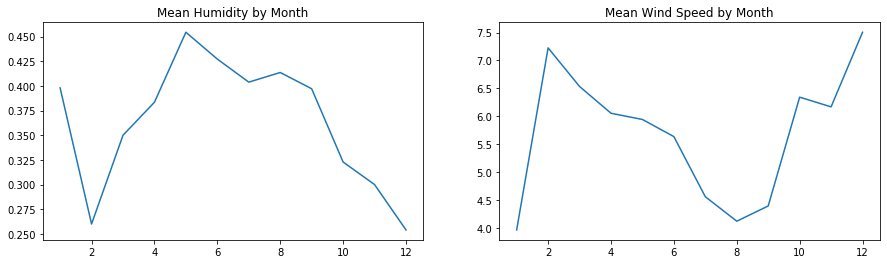

In [13]:
plt.figure(figsize = [15, 4])

# mean temperature high by month (Farenheit)
plt.subplot(1, 2, 1)
plt.title('Mean Humidity by Month')
plt.plot(df.groupby(fire_month)['humidity'].mean())

# mean wind speed of wildfires by month
plt.subplot(1, 2, 2)
plt.title('Mean Wind Speed by Month')
plt.plot(df.groupby(fire_month)['windSpeed'].mean())

### Findings
* The windier months are when there are fewer fires; however, it could indicate why there are some large fires in those colder months.
* It's a bit surprising to find the humidity levels lower in February and March than in the summer months...

## Look for Multicollinearity

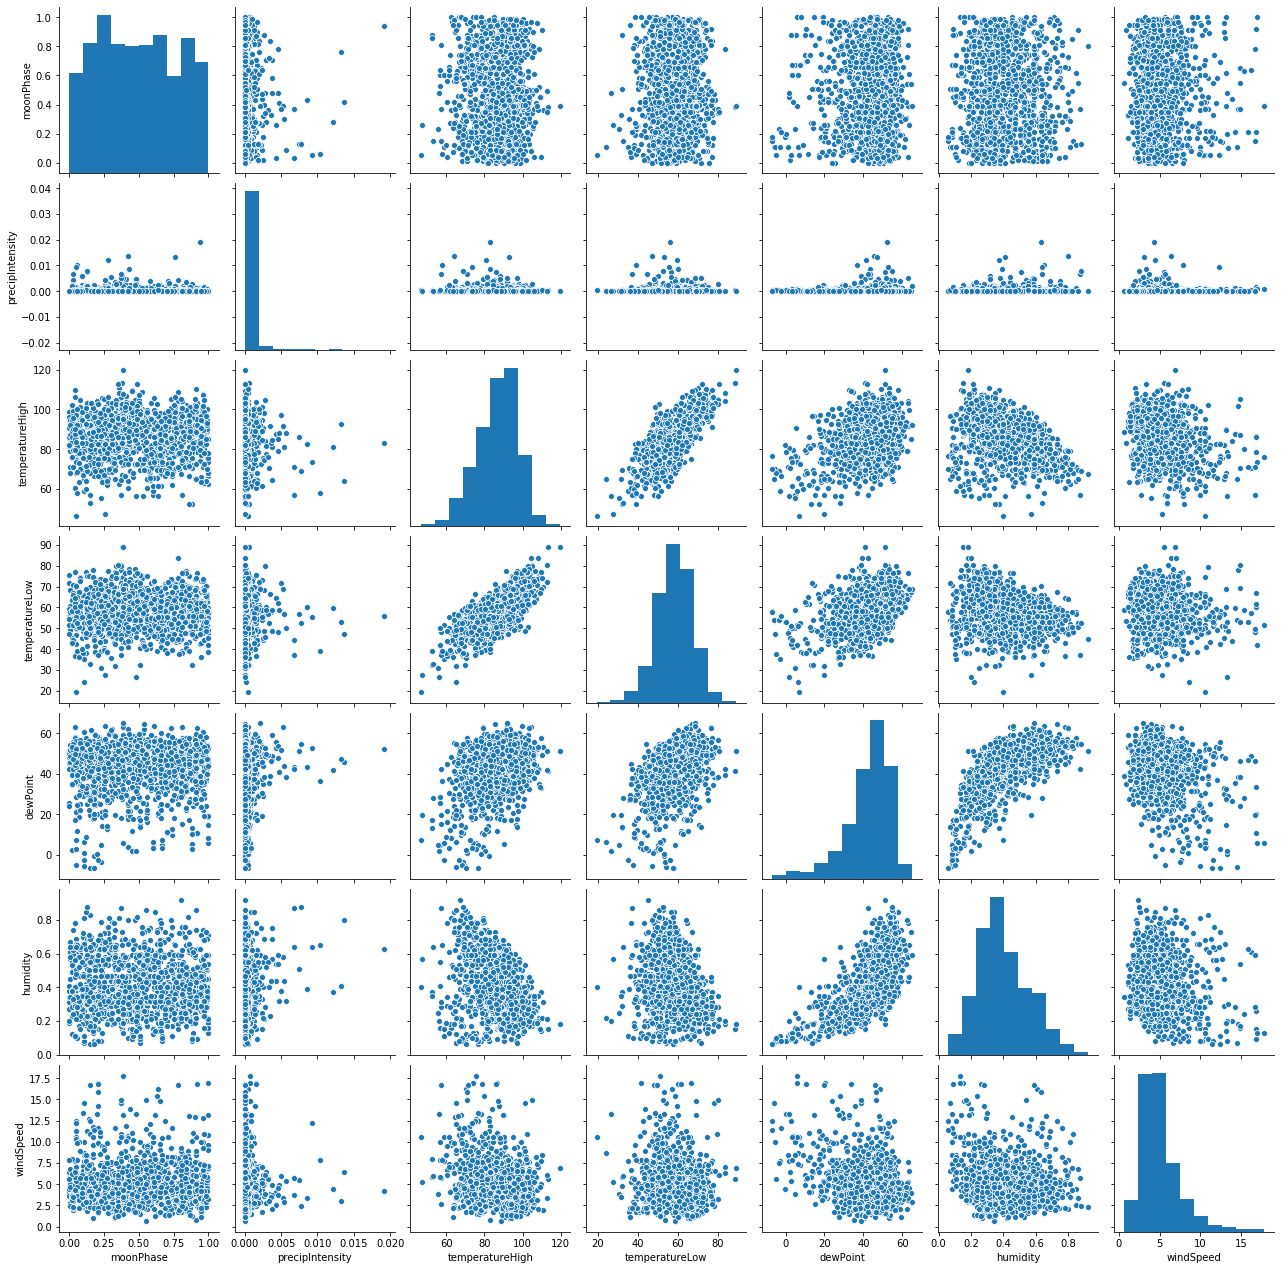

In [14]:
sns.pairplot(df.iloc[:, -7:])

# alternative with Pandas 
# pd.plotting.scatter_matrix(df.iloc[:, -6:], figsize=(30, 30))

As expected, there is a strong linear correlation between min and max temperatures.